# DREAM EXPERIMENT: C/S ratio vs inclination of BGO

Importing modules

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

## Scintillation vs Cherenkov light
Here the aim is to plot the ratio: $\frac{N_C}{N_s}$, the number of Cherenkov photon produced over the number of scintillation ones. In order to do that, it si needed to load a lot of files.

#### Loading files & first analysis:

In [40]:
# directory
directory = '' '../datasets/Total/'
preFileName = '_'
postFileName = '_degrees.txt'

# angles:
theta_names = ['180','187_5','1815','1822_5','1830','1840']#['0','p15','p20','p25','p30','p40']
angles = [0,7.5,15,22.5,30,40]#[0,15,20,25,30,40]
fileNames = [preFileName + i + postFileName for i in theta_names]

# defining quantities:
# (A) from file:
energyC, energyS, numberC, numberS = [],[],[],[]
# (B) to evaluate:
num_ratio, delta_num_ratio, energy_ratio = [],[],[]
delta_numberC, delta_numberS = [],[]

for name in fileNames:
    a, b, c, d = np.loadtxt(directory+name, unpack=True, usecols=(4,5,6,7))
    
    # mean energies for each event
    energyC.append(sum(a)/len(a))
    energyS.append(sum(b)/len(b))
    energy_ratio.append(energyC[-1]/energyS[-1])
    
    # mean numbers for each event
    numberC.append(sum(c)/len(c))
    numberS.append(sum(d)/len(d))
    num_ratio.append(numberC[-1]/numberS[-1])
    # errors on numbers
    delta_numberC.append(np.sqrt(sum(c))/len(c))
    delta_numberS.append(np.sqrt(sum(d))/len(d))
    delta_relative_square = (delta_numberC[-1]/numberC[-1])*(delta_numberC[-1]/numberC[-1]) + (delta_numberS[-1]/numberS[-1])*(delta_numberS[-1]/numberS[-1])
    delta_num_ratio.append( num_ratio[-1]*np.sqrt(delta_relative_square) )

Writing in an output file:

In [41]:
out = open(directory + 'CS_ratio.txt', 'w')

out.write('#angle(°)\tnumber_C\tdelta_nC\tnumber_S\tdelta_nS\tNumRatio\tdeltaNumRatio\tenergyratio\n')

for i,val in enumerate(angles):
    string = '{0}\t{1}\t{2:.4E}\t{3}\t{4:.4E}\t{5:.4E}\t{6:.4E}\t{7:.4E}\n'.format(val, numberC[i], delta_numberC[i], numberS[i],
                                                             delta_numberS[i], num_ratio[i], delta_num_ratio[i],
                                                             energy_ratio[i])
    out.write(string)

out.close()

C/S ratio

In [42]:
# presettings and load files
numberCereDet, numberCereProd, numberScintDet, numberScintProd = [],[],[],[]
preFileName = 'numbers'
postFileName = '.txt'
numberFile = theta_names #['0','P15','P20','p25','P30','P40']
FileNames = [directory + preFileName + i + postFileName for i in numberFile]

a,b,c,d = [],[],[],[]
for name in FileNames:
    a, b, c, d = np.loadtxt(name, unpack=True, usecols=(0,1,2,3))
    numberCereDet.append(sum(a)/len(a))
    numberCereProd.append(sum(b)/len(b))
    numberScintDet.append(sum(c)/len(c))
    numberScintProd.append(sum(d)/len(d))

print('Angles:\t{0}\n'.format(numberFile))
print('Produced Cherenkov:{0}\nDetected Cherenkov:{1}\nRatio Cherenkov:{2}\n'.format(numberCereProd, numberCereDet, frequenciesC))
print('Produced scintillation:{0}\nDetected scintillation:{1}\nRatio scintillation:{2}\n'.format(numberScintProd, numberScintDet, frequenciesS))

Angles:	['180', '187_5', '1815', '1822_5', '1830', '1840']

Produced Cherenkov:[1633.57, 1648.89, 1701.77, 1773.535, 1889.09, 2135.715]
Detected Cherenkov:[128.16, 138.73, 150.92, 159.765, 180.46, 198.855]
Ratio Cherenkov:[0.07845393830689838, 0.08868413475381513, 0.09552747619224072, 0.09310933340824969]

Produced scintillation:[137521.73, 138509.785, 141301.475, 147954.59, 157903.02, 178875.325]
Detected scintillation:[10045.54, 10248.315, 10524.705, 10917.31, 11970.5, 13610.055]
Ratio scintillation:[0.07304692865629309, 0.07448404201017718, 0.07580918971657415, 0.07608682192471208]



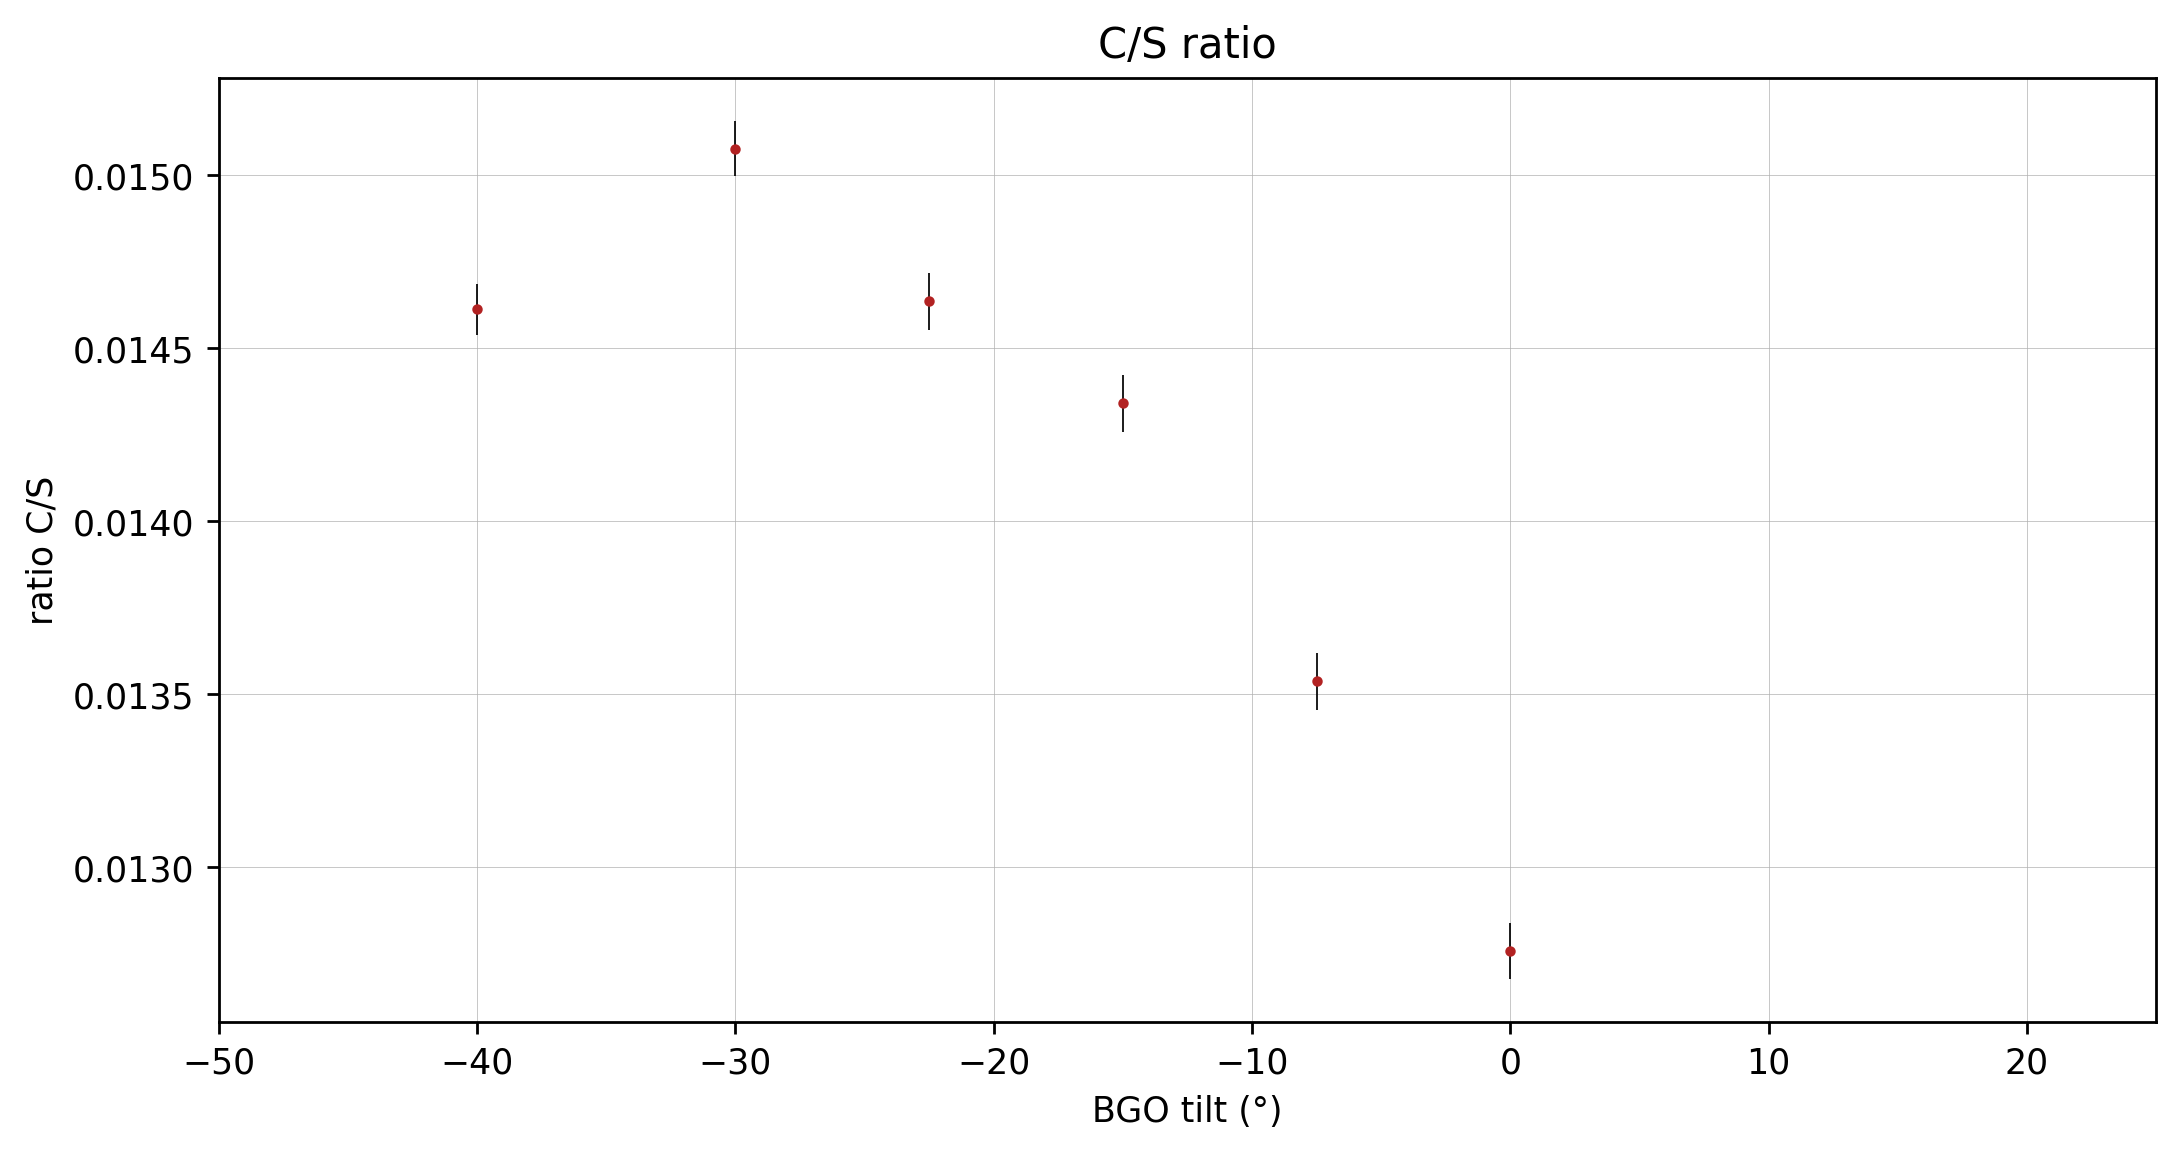

In [43]:
# flip angles
flipped_angles = []
for theta in angles:
    flipped_angles.append(-theta)

# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(flipped_angles, num_ratio, yerr=delta_num_ratio, xerr=None, label='C/S number of $\gamma$s',
             marker='o', markersize=2, color="firebrick", ecolor="black", lw=0, elinewidth=0.5)

# visualize
plt.title('C/S ratio')
plt.xlabel('BGO tilt (°)')
plt.ylabel('ratio C/S')
plt.xlim([-50,25])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()
fig.savefig("CS_ratio.jpg",bbox_inches='tight')

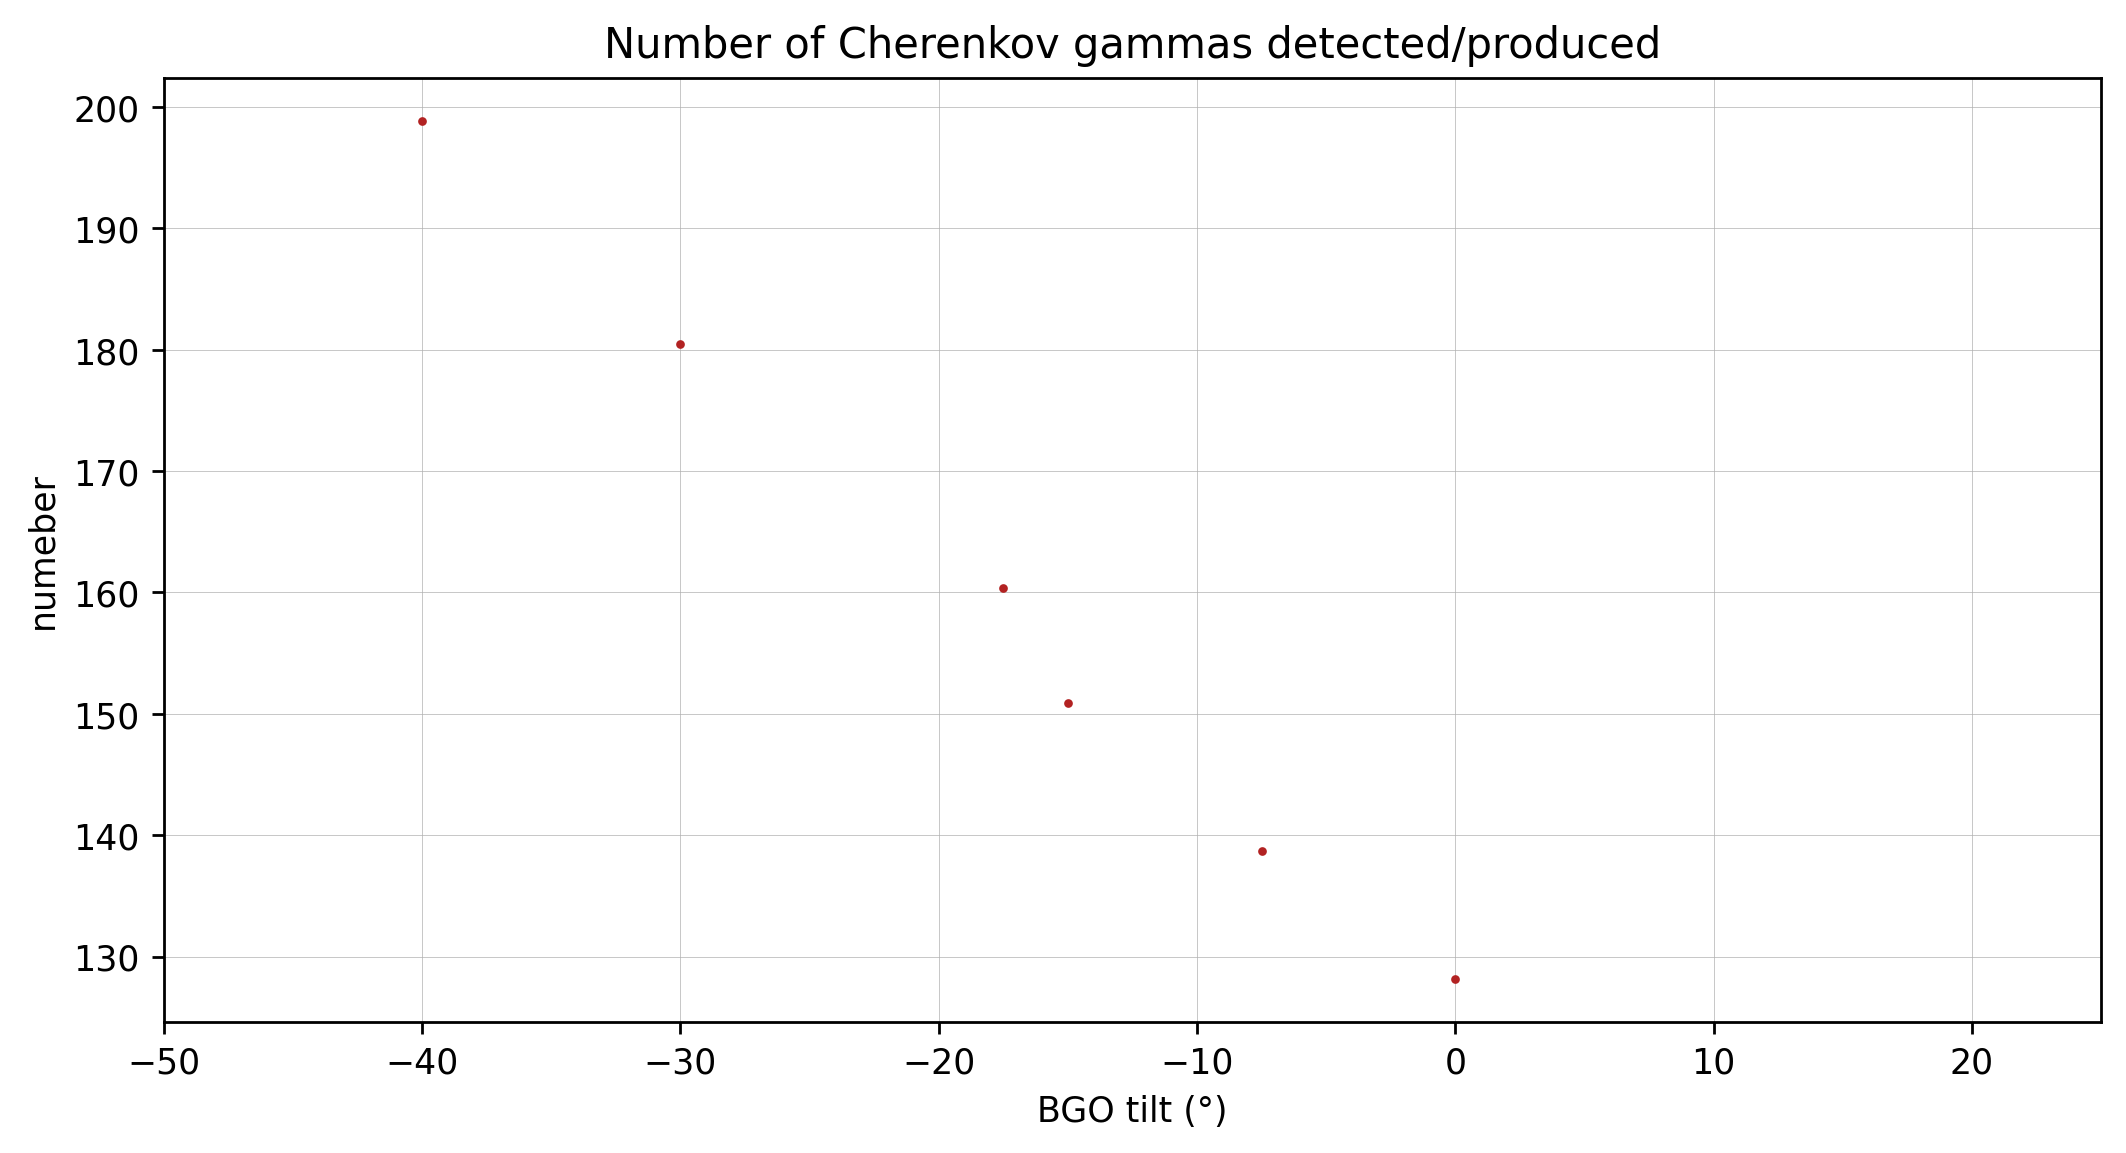

In [36]:
# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(flipped_angles, numberCereDet, yerr=None, xerr=None, label='Cherenkov number of $\gamma$s',
             marker='o', markersize=1.5, color="firebrick", ecolor="black", lw=0., elinewidth=0.5)

# visualize
plt.title('Number of Cherenkov gammas detected/produced')
plt.xlabel('BGO tilt (°)')
plt.ylabel('numeber')
plt.xlim([-50,25])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()
#fig.savefig("number_C.jpg",bbox_inches='tight')

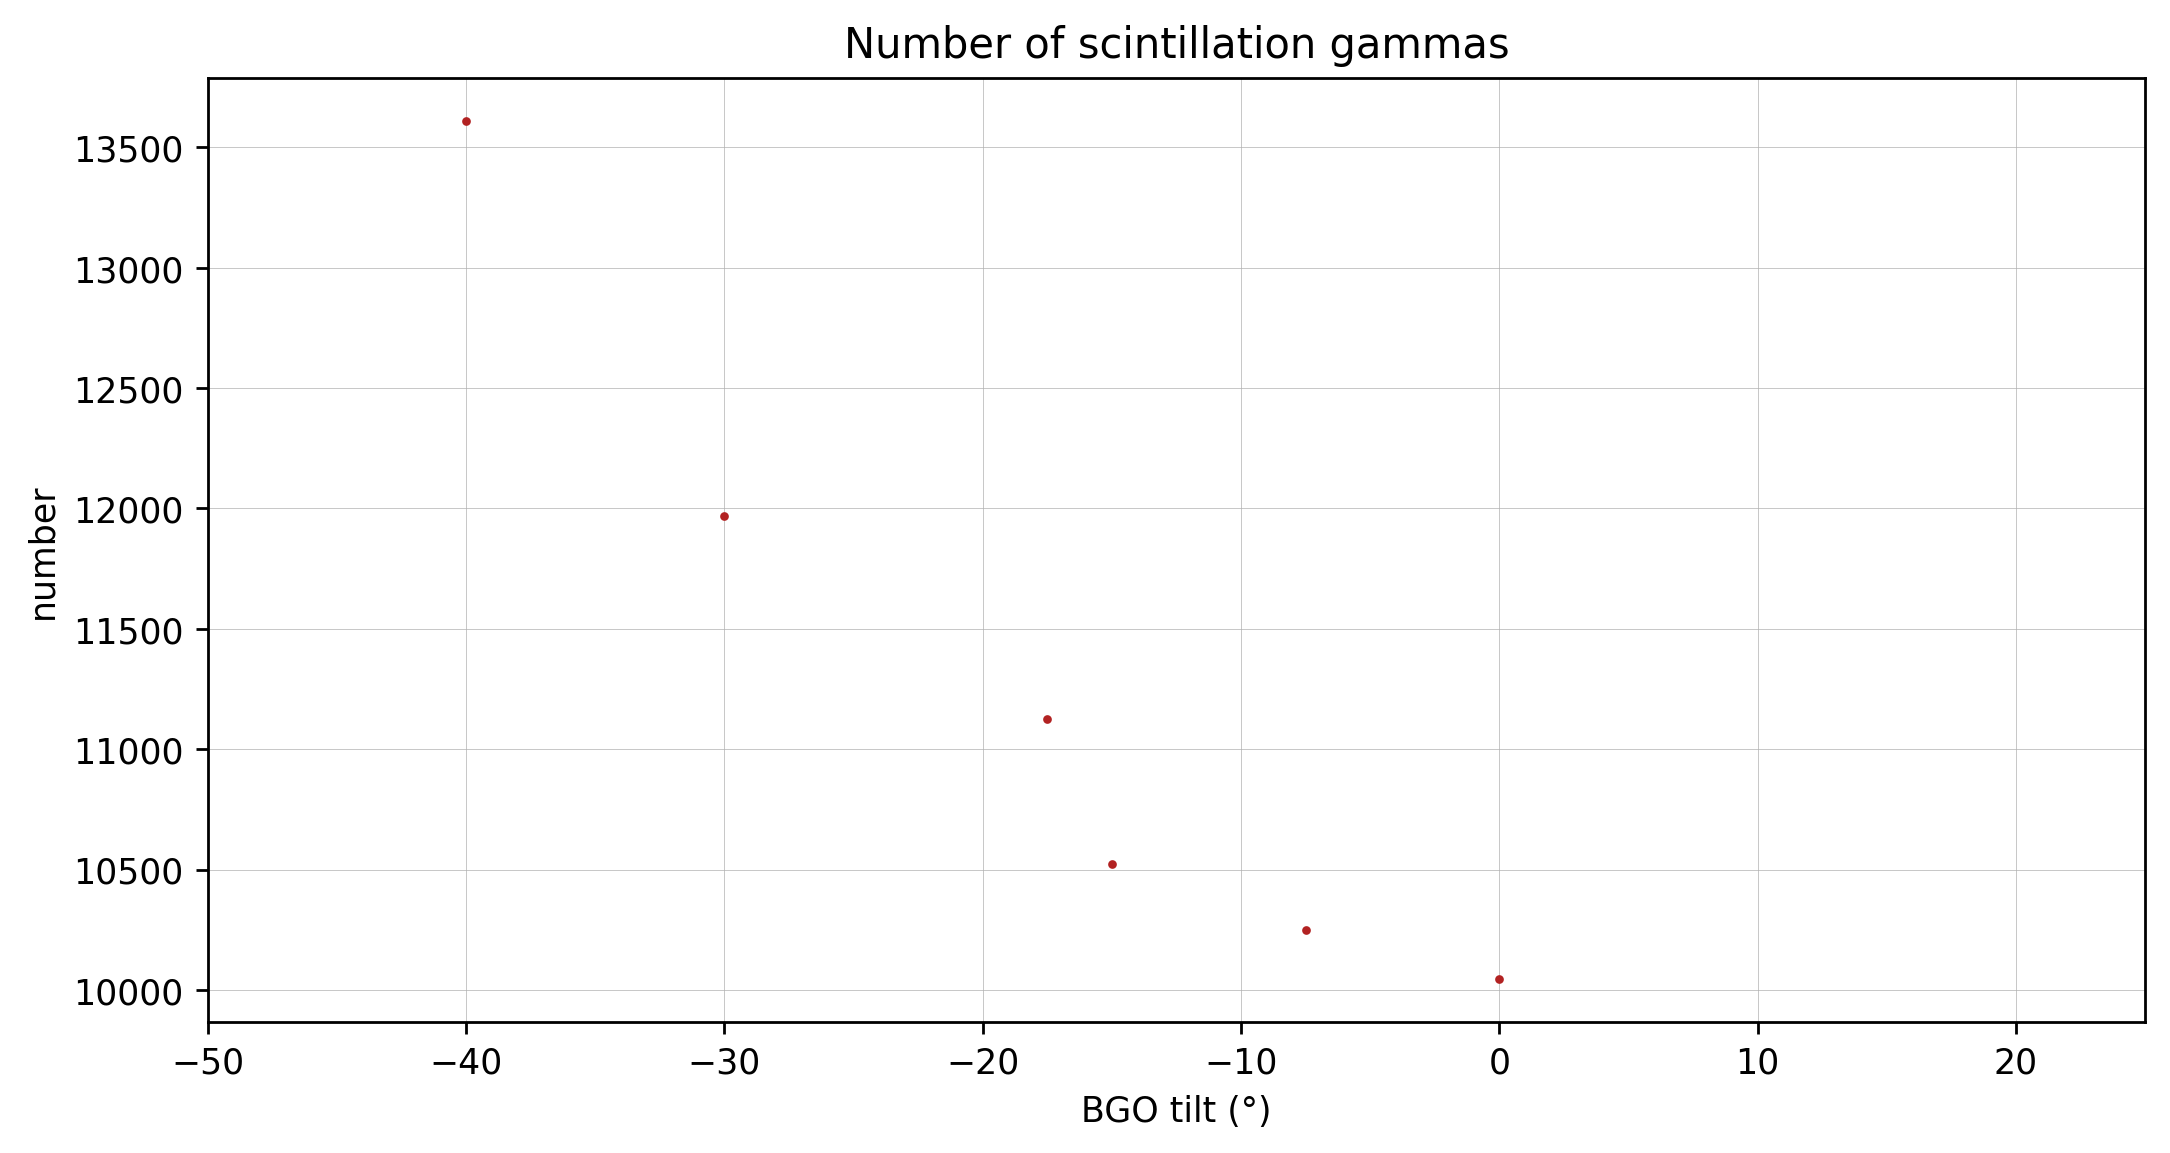

In [37]:
# prepare the figure
fig = plt.figure(111, figsize=(10,5), dpi=250)

# plot data
plt.errorbar(flipped_angles, numberScintDet, yerr=None, xerr=None, label='Cherenkov number of $\gamma$s',
             marker='o', markersize=1.5, color="firebrick", ecolor="black", lw=0., elinewidth=0.5)

# visualize
plt.title('Number of scintillation gammas')
plt.xlabel('BGO tilt (°)')
plt.ylabel('number')
plt.xlim([-50,25])
plt.grid(linestyle='-', linewidth=0.2)
plt.show()
#fig.savefig("number_S.jpg",bbox_inches='tight')